In [49]:
import numpy as np
import sys
import os
from PIL import Image, ImageStat
import glob
from matplotlib import pyplot as plt

### Set global variables

In [2]:
DATA_PATH = "../cifar10_data"
LABEL_PATH = DATA_PATH + "/cifar10/labels.txt"

### Load labels

In [52]:
def load_labels(file):
    f = open(file, "r")
    labels = {}
    for i, label in enumerate(f):
        labels[i] = label.split()[0]
    return labels

In [53]:
labels = load_labels(LABEL_PATH)

In [54]:
print(labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


### Load train/test data

In [59]:
def load_data(mode, labels):
    label_list = []
    image_id = []
    image_pix = []
    keys = labels.keys()
    for i in keys:
        print("loading " + labels[i])
        for file in glob.iglob(os.path.join(DATA_PATH, mode, labels[i], "*.png")):
            im = Image.open(file)
            image_id.append(im)
            pix = np.array(im.getdata()).ravel()
            image_pix.append(pix)
            label_list.append(i)
    return label_list, image_id, np.asarray(image_pix)

In [51]:
train_label, train_id, train_pix = load_data("train", labels)

loading airplane
loading automobile
loading bird
loading cat
loading deer
loading dog
loading frog
loading horse
loading ship
loading truck


In [44]:
t0_label = train_label[0]
t0_id = train_id[0]
t0_pix = train_pix[0]
print(len(train_label), "=", len(train_id), "=", len(train_pix))

50000 = 50000 = 50000


airplane
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x7F7ECBBDC8D0>
[123 154 174 ... 138 131 142]


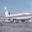

In [46]:
print(t0_label)
print(t0_id)
print(t0_pix)
t0_id

In [60]:
test_label, test_id, test_pix = load_data("test", labels)

loading airplane
loading automobile
loading bird
loading cat
loading deer
loading dog
loading frog
loading horse
loading ship
loading truck


### Predict

In [61]:
def l1(p1, p2):
    length = len(p1)
    return sum([abs(p1[i] - p2[i]) for i in range(length)])

In [106]:
def predict(train_label, train_id, train_pix, image_pix, dist_fc, k=1):
    distances = np.array([dist_fc(pix, image_pix) for pix in train_pix])
    min_indices = np.argsort(distances)[:k]
    min_id = [train_id[ind] for ind in min_indices]
    min_labels = np.array([train_label[ind] for ind in min_indices])
    pred_label = np.argmax(np.bincount(min_labels))
    return pred_label, min_id

In [82]:
image_pix = test_pix[0]
image_id = test_id[0]
image_label = test_label[0]

In [83]:
predict, min_id = predict(train_label, train_id, train_pix, image_pix, l1, k=10)

[ 1718  2887  2003 12168  4758 41061 41571  3303  1832 11942]


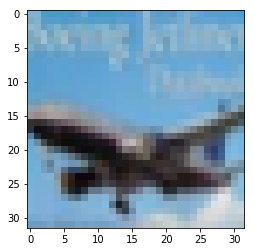

In [99]:
plt.imshow(min_id[0])

### Test

In [109]:
def test(test_data, train_data, k, dist_fc):
    test_label, test_id, test_pix = test_data
    train_label, train_id, train_pix = train_data
    correct = 0
    total = 0
    correct_prediction = []
    false_prediction = []
    for i, image_pix in enumerate(test_pix):
        prediction, _ = predict(train_label, train_id, train_pix, image_pix, dist_fc, 7)
        if prediction == test_label[i]:
            correct += 1
            correct_prediction.append(i)
        else:
            false_prediction.append(i)
        total += 1
        if i % 100 == 0:
            print("correct = {}, total = {}, accuracy: {}%".format(correct, total, (correct / total) * 100))
    print("final accuracy: {}%".format((correct / total) * 100))
    return correct_prediction, false_prediction

In [ ]:
cp, fp = test((test_label, test_id, test_pix), (train_label, train_id, train_pix), 7, l1)

[ 1718  2887  2003 12168  4758 41061 41571]
correct = 1, total = 1, accuracy: 100.0%
[41851 43314 12021  9071 14013  6291 43880]
[  910 32392   685 19727  3923  1792 19121]
[ 3684 21092 12406 13129 47245 11591 12688]
[ 2058 43935 44253 44466 44155 44938 43061]
[39637   598 42099  3204  2262 44253 44938]
[ 4287  3018   999 21832 45434  2019  4990]
[ 4062 19413  6482  8381   836 42590 41238]
[ 7855 31271  4856  9138  9328  5418 12357]
[41099 41953 13336 44693  3611 11483 40523]
[42104 43260  9129   884  1849  1628 42194]
[43611  3211 43597 42233 43174 40996 41334]
[ 1463  4278  3599   534 11093  9262 31271]
[41642 43815  1628  1758 41601 40703  9625]
[  828  1076 40824   183  3028 40784 42183]
[44832 21407 41711  4587 41380 40107 13978]
[ 3332  2290 42502  1818  1585  2389  1797]
[  168   718 11651 12547 29217 14546   885]
[ 2717 21832  3018   512 13806  3565  5566]
[40134  2877 44620 40253 40087 41975  4392]
[ 4414  2898 43666  9397 44860 41771  3961]
[  596 12669 21271 23380 24648 2433